In [546]:
#importing libraries
import pandas as pd
import numpy as np
import os as os
import math as math
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
os.getcwd()

'C:\\Users\\rites'

In [3]:
os.chdir('D:\Ritesh\Analytics\Analytics Vidhya\Hackathon\Loan Prediction')

In [381]:
df = pd.read_csv('train_ctrUa4K.csv')

In [382]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# No of rows and columns in a dataset
df.shape

(614, 13)

In [13]:
# Percentage of Null values in a dataset
(df.isnull().sum()) *100/ len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
# Checking event rate
df['Loan_Status'].value_counts() * 100/len(df)

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

## Variable selection - IV and WOE

In [523]:
df_IV = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 
            'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [524]:
# Converting variables like 'Dependent', 'Credit_History' and 'Loan_Amount_Term' to categorical variable
df_IV['Dependents'] = df_IV['Dependents'].astype(str)
df_IV['Credit_History'] = df_IV['Credit_History'].astype(str)
df_IV['Loan_Amount_Term'] = df_IV['Loan_Amount_Term'].astype(str)

C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [525]:
x = {}
y = {}
z = {}
for i in df_IV.columns:
    if(df_IV[i].dtype != 'object'):
        df_IV[i+'_decile'] = pd.qcut(df_IV[i], 10, labels=False)
        df_IV[i+'_decile'] = df_IV[i+'_decile'].fillna(-1)
        df_IV[i] = df_IV[i].fillna(-99)
        df_IV = pd.merge(pd.merge(df_IV, pd.DataFrame(data = df_IV[i].groupby(df_IV[i+'_decile']).max()).reset_index(), on = i+'_decile', how = 'left'),  pd.DataFrame(data = df_IV[i].groupby(df_IV[i+'_decile']).min()).reset_index(), on = i+'_decile', how = 'left') 
        z[i] = pd.DataFrame(pd.crosstab(df_IV[i+'_decile'].fillna('NA'), df_IV['Loan_Status'])).reset_index()
        z[i]['CR'] = z[i]['Y'] * 100/ z[i]['Y'].sum()
        z[i]['NCR'] = z[i]['N'] * 100/ z[i]['N'].sum()
        z[i]['WOR'] = np.log(z[i]['NCR']/ z[i]['CR'])
        z[i]['IV'] = (z[i]['WOR']/100) * (z[i]['NCR'] - z[i]['CR'])
        y[i] = z[i]['IV'].replace([np.inf, -np.inf], 0).sum()
    else:
        if(i!= 'Loan_Status'):
            x[i] = pd.DataFrame(pd.crosstab(df_IV[i].fillna('NA'), df_IV['Loan_Status'])).reset_index()
            x[i]['CR'] = (x[i]['Y']) * 100/ (x[i]['Y']).sum()
            x[i]['NCR'] = (x[i]['N']) * 100/ (x[i]['N']).sum()
            x[i]['WOE'] = np.log((x[i]['NCR'])/ (x[i]['CR']))
            x[i]['IV'] = (x[i]['WOE']/100) * (x[i]['NCR'] - x[i]['CR'])
            y[i] = x[i]['IV'].replace([np.inf, -np.inf], 0).sum()
t = pd.DataFrame(list(y.items()), columns = ['Variable', 'IV'])
t.sort_values(by = ['IV'], ascending = False)

C:\Users\rites\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A valu

,Variable,IV
8,Credit_History,1.562226
9,Property_Area,0.096228
6,LoanAmount,0.066808
7,Loan_Amount_Term,0.053261
1,Married,0.036282
3,Education,0.033044
5,ApplicantIncome,0.030574
2,Dependents,0.028513
0,Gender,0.004077
4,Self_Employed,0.001234


#### Let us check WOE and IV of few individual variables

In [522]:
x['Credit_History']

Loan_Status,Credit_History,N,Y,CR,NCR,WOE,IV
0,0.0,82,7,1.658768,42.708333,3.248319,1.333421
1,1.0,97,378,89.573460,50.520833,-0.572673,0.223644
2,nan,13,37,8.767773,6.770833,-0.258459,0.005161


In [459]:
x['Married']

Loan_Status,Married,N,Y,CR,NCR,WOE,IV
0,NA,0,3,0.710900,0.000000,-inf,inf
1,No,79,134,31.753555,41.145833,0.259118,0.024337
2,Yes,113,285,67.535545,58.854167,-0.137591,0.011945


In [526]:
x['Gender']

Loan_Status,Gender,N,Y,CR,NCR,WOE,IV
0,Female,37,75,17.772512,19.270833,0.080940,0.001213
1,Male,150,339,80.331754,78.125000,-0.027855,0.000615
2,NA,5,8,1.895735,2.604167,0.317506,0.002249


## Variable Selection - Correlation

In [533]:
df_corr = df

In [538]:
df_corr['target'] = np.where(df_corr['Loan_Status'] == 'Y', 1,0)

In [539]:
df_corr.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
target,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


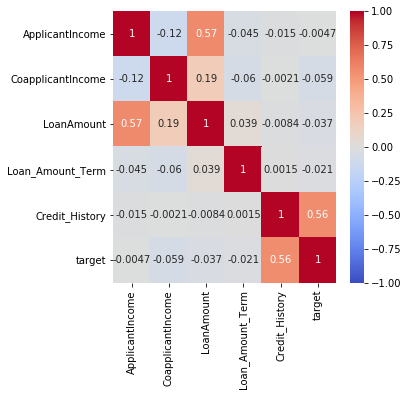

In [544]:
plt.figure(figsize=(5,5))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True);

## SelectKBest Method

#### Picking only categorical independent variables

In [576]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']]

In [577]:
X1.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan
0,1,0,0,0,0,0,0,0,1,1,0
1,1,1,1,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,1,1,0
3,1,1,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,0,1,1,0


In [578]:
X['Credit_History'] = X['Credit_History'].astype(str)

C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Getting dummy variables

In [559]:
X1 = pd.get_dummies(X, prefix = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History'], columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History'], 
               prefix_sep = '_', drop_first = 'True')

In [555]:
Y = df['Loan_Status']

#### Applying SelectKBest to identify top 5 features

In [614]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X1,Y)
dfscores = pd.DataFrame(fit.scores_, columns = ['Score'])
dfcolumns = pd.DataFrame(X1.columns, columns = ['Variable'])

In [615]:
Imp = pd.merge(dfcolumns, dfscores, how = 'inner', left_index=True, right_index=True)
Imp.sort_values('Score', ascending = False).iloc[0:5]

,Variable,Score
9,Credit_History_1.0,26.014804
7,Property_Area_Semiurban,7.103093
5,Education_Not Graduate,3.540502
3,Dependents_2,1.996446
1,Married_Yes,1.534292


#### So Credit_History, Property_Area, Education, Dependent and Married are the top 5 variables